# ALVIATUL NAZILA
# 202010370311293
# ANALISIS BIG DATA 7B/D

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_assessments = pd.read_csv('./assessments.csv')
df_courses = pd.read_csv('./courses.csv')
df_studentAssessment = pd.read_csv('./studentAssessment.csv')
df_studentInfo = pd.read_csv('./studentInfo.csv')
df_studentRegistration = pd.read_csv('./studentRegistration.csv')
df_studentVle = pd.read_csv('./studentVle.csv')
df_vle = pd.read_csv('./vle.csv')

In [3]:
df_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
df_courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
df_studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [6]:
df_studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [7]:
df_studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [8]:
df_studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [9]:
df_vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


## Model

### student Info

In [10]:
df_studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [11]:
df_studentInfo = df_studentInfo.dropna(subset=['imd_band'])

In [12]:
df_studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31482 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           31482 non-null  object
 1   code_presentation     31482 non-null  object
 2   id_student            31482 non-null  int64 
 3   gender                31482 non-null  object
 4   region                31482 non-null  object
 5   highest_education     31482 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              31482 non-null  object
 8   num_of_prev_attempts  31482 non-null  int64 
 9   studied_credits       31482 non-null  int64 
 10  disability            31482 non-null  object
 11  final_result          31482 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


In [13]:
df_studentInfo.duplicated().sum()

0

In [14]:
df_studentInfo = df_studentInfo.drop_duplicates()

In [15]:
df_studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31482 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           31482 non-null  object
 1   code_presentation     31482 non-null  object
 2   id_student            31482 non-null  int64 
 3   gender                31482 non-null  object
 4   region                31482 non-null  object
 5   highest_education     31482 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              31482 non-null  object
 8   num_of_prev_attempts  31482 non-null  int64 
 9   studied_credits       31482 non-null  int64 
 10  disability            31482 non-null  object
 11  final_result          31482 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


In [16]:
df_studentInfo.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

### df_student Registration

In [17]:
df_studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [18]:
df_studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [19]:
df_studentRegistration["date_registration"].fillna(df_studentRegistration["date_registration"].mean(), inplace=True)
df_studentRegistration["date_unregistration"].fillna(df_studentRegistration["date_unregistration"].mean(), inplace=True)

In [20]:
df_studentRegistration.duplicated().sum()

0

In [21]:
df_studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32593 non-null  float64
 4   date_unregistration  32593 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


### model

In [22]:
df1 = pd.DataFrame(df_studentInfo)
df2 = pd.DataFrame(df_studentRegistration)

In [23]:
# grup dataset berdasarkan kolom "id_student"
df = pd.merge(df1, df2, on='id_student', how='inner')

In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

code_module_x           0
code_presentation_x     0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
code_module_y           0
code_presentation_y     0
date_registration       0
date_unregistration     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39400 entries, 0 to 39399
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module_x         39400 non-null  object 
 1   code_presentation_x   39400 non-null  object 
 2   id_student            39400 non-null  int64  
 3   gender                39400 non-null  object 
 4   region                39400 non-null  object 
 5   highest_education     39400 non-null  object 
 6   imd_band              39400 non-null  object 
 7   age_band              39400 non-null  object 
 8   num_of_prev_attempts  39400 non-null  int64  
 9   studied_credits       39400 non-null  int64  
 10  disability            39400 non-null  object 
 11  final_result          39400 non-null  object 
 12  code_module_y         39400 non-null  object 
 13  code_presentation_y   39400 non-null  object 
 14  date_registration     39400 non-null  float64
 15  date_unregistration

In [27]:
df

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA,2013J,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA,2013J,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA,2013J,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA,2013J,-176.0,49.757645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,GGG,2014J,-4.0,49.757645
39396,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG,2014J,-23.0,49.757645
39397,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG,2014J,-129.0,49.757645
39398,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG,2014J,-49.0,101.000000


In [28]:
# Memeriksa apakah kolom code_module_x dan code_module_y sama atau tidak
are_equal = df['code_module_x'] == df['code_module_y']

# Mencetak baris yang memiliki nilai yang sama pada kedua kolom
df = df[are_equal]

# Mencetak hasil
df


,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA,2013J,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA,2013J,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA,2013J,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA,2013J,-176.0,49.757645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,GGG,2014J,-4.0,49.757645
39396,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG,2014J,-23.0,49.757645
39397,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG,2014J,-129.0,49.757645
39398,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG,2014J,-49.0,101.000000


In [29]:
# Memeriksa apakah kolom code_module_x dan code_module_y sama atau tidak
are_equal = df['code_presentation_x'] == df['code_presentation_y']

# Mencetak baris yang memiliki nilai yang sama pada kedua kolom
df = df[are_equal]

# Mencetak hasil
df


,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA,2013J,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA,2013J,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA,2013J,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA,2013J,-176.0,49.757645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,GGG,2014J,-4.0,49.757645
39396,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG,2014J,-23.0,49.757645
39397,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG,2014J,-129.0,49.757645
39398,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,GGG,2014J,-49.0,101.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31482 entries, 0 to 39399
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module_x         31482 non-null  object 
 1   code_presentation_x   31482 non-null  object 
 2   id_student            31482 non-null  int64  
 3   gender                31482 non-null  object 
 4   region                31482 non-null  object 
 5   highest_education     31482 non-null  object 
 6   imd_band              31482 non-null  object 
 7   age_band              31482 non-null  object 
 8   num_of_prev_attempts  31482 non-null  int64  
 9   studied_credits       31482 non-null  int64  
 10  disability            31482 non-null  object 
 11  final_result          31482 non-null  object 
 12  code_module_y         31482 non-null  object 
 13  code_presentation_y   31482 non-null  object 
 14  date_registration     31482 non-null  float64
 15  date_unregistration   31

In [31]:
df = df.drop(columns=['code_module_y'])
df = df.drop(columns=['code_presentation_y'])

In [32]:
df

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,49.757645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,49.757645
39396,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,49.757645
39397,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,49.757645
39398,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.000000


In [33]:
final_result_column = df['final_result']
final_result_column

0               Pass
1               Pass
2          Withdrawn
3               Pass
4               Pass
            ...     
39395           Fail
39396    Distinction
39397           Pass
39398      Withdrawn
39399    Distinction
Name: final_result, Length: 31482, dtype: object

In [34]:
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,49.757645


In [ ]:
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,49.757645


In [35]:
df.tail()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
39395,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,49.757645
39396,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,49.757645
39397,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,49.757645
39398,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.000000
39399,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,-28.0,49.757645


In [36]:
# Loop melalui kolom-kolom DataFrame
for column in df.columns:
    le = LabelEncoder()
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,0,1,11391,1,0,1,9,2,0,240,0,2,-159.0,49.757645
1,0,1,28400,0,6,1,2,1,0,60,0,2,-53.0,49.757645
2,0,1,30268,0,5,0,3,1,0,60,1,3,-92.0,12.000000
3,0,1,31604,0,7,0,5,1,0,60,0,2,-52.0,49.757645
4,0,1,32885,0,11,2,5,0,0,60,0,2,-176.0,49.757645


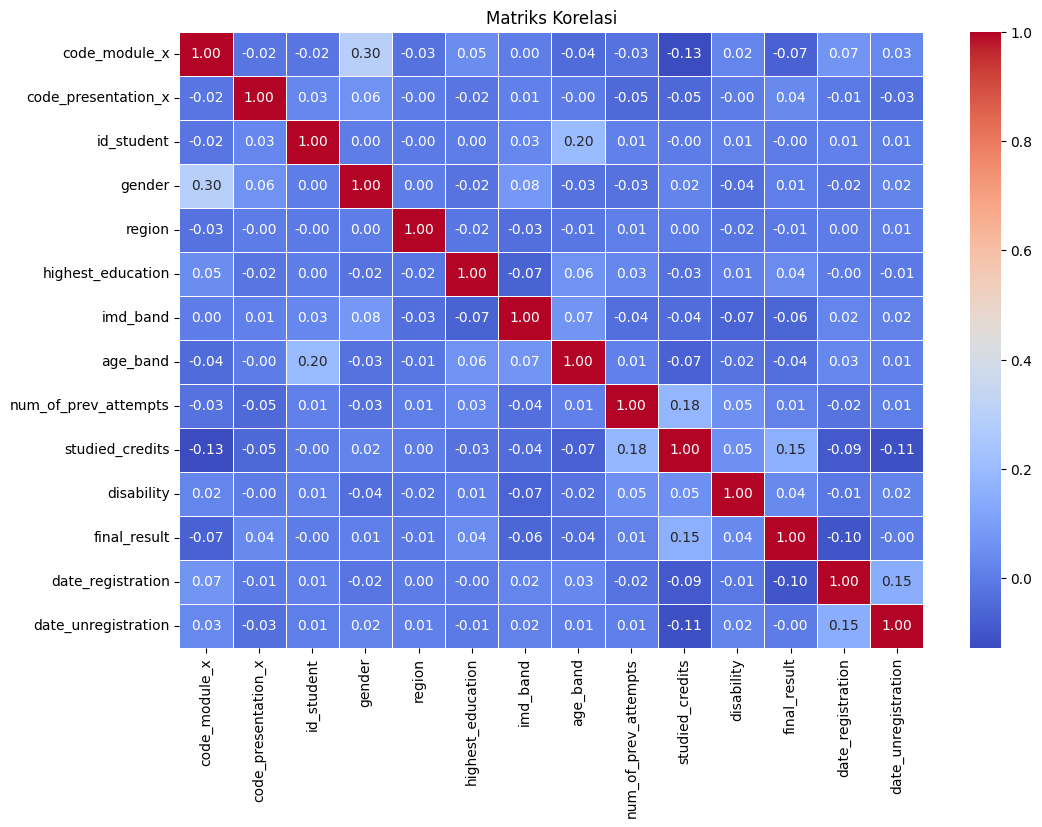

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


In [38]:
labelencoder = LabelEncoder()
df['disability'] = labelencoder.fit_transform(df['disability'])

In [39]:
X = df[df.columns.difference(["disability", "id_student", "date_unregistration", "date_registration"])].values
y = df["disability"].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [41]:
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Reshape the data for CNN input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [43]:
from tensorflow import keras

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


In [44]:
# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [45]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=25, batch_size=64)

Epoch 1/25
419/419 [==============================] - 2s 3ms/step - loss: 0.3357 - accuracy: 0.8991
Epoch 2/25
419/419 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.9012
Epoch 3/25
419/419 [==============================] - 1s 3ms/step - loss: 0.3195 - accuracy: 0.9012
Epoch 4/25
419/419 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.9012
Epoch 5/25
419/419 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.9012
Epoch 6/25
419/419 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.9012
Epoch 7/25
419/419 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.9012
Epoch 8/25
419/419 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.9012
Epoch 9/25
419/419 [==============================] - 1s 2ms/step - loss: 0.3132 - accuracy: 0.9012
Epoch 10/25
419/419 [==============================] - 1s 2ms/step - loss: 0.3111 - accuracy: 0.9012

In [46]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

148/148 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8967
Test Accuracy: 0.8967


In [47]:
# Make predictions
predictions = model.predict(X_test_reshaped)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy on test data: {accuracy:.2f}')

148/148 [==============================] - 0s 1ms/step
Accuracy on test data: 0.90


In [48]:
# Buat prediksi pada test
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

148/148 [==============================] - 0s 1ms/step


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

confusion = confusion_matrix(y_test, predicted_labels)

accuracy = accuracy_score(y_test, predicted_labels)

report = classification_report(y_test, predicted_labels)

print("Confusion Matrix:")
print(confusion)

print(f'\nAccuracy:" {accuracy:.2f}')

print("\nClassification Report:")
print(report)

Confusion Matrix:
[[4235    0]
 [ 488    0]]

Accuracy:" 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4235
           1       0.00      0.00      0.00       488

    accuracy                           0.90      4723
   macro avg       0.45      0.50      0.47      4723
weighted avg       0.80      0.90      0.85      4723



c:\Users\tatok yuliantoko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tatok yuliantoko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tatok yuliantoko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th